In [2]:
# weiter bei Box 3 -> versuchen mit den in Floats umgewandelten Daten einen plot zu machen.
# später versuchen plotly zu integrieren.

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np


In [12]:
#Liste der Daten des jeweiligen letzten Ereignisses im Vorjahr
#Ref: https://www.calsky.com/cs.cgi/Moon/8?&lang=de
fullmoon_dates = ["21.12.2010 09:13","10.12.2011 15:36","28.12.2012 11:21","17.12.2013 10:28","06.12.2014 10:26","25.12.2015 12:11","14.12.2016 01:05","03.12.2017 16:47","22.12.2018 18:48","12.12.2019 06:12"]
perigee_dates  = ["27.12.2010 13:24","22.12.2011 03:50","13.12.2012 00:07","04.12.2013 11:02","24.12.2014 17:33","21.12.2015 10:09","13.12.2016 00:35","04.12.2017 09:52","24.12.2018 10:56","18.12.2019 21:27"]
#nodeN: nördlichste Position
maxN_dates     = ["20.12.2010 13:34","10.12.2011 14:35","26.12.2012 22:23","17.12.2013 01:56","07.12.2014 10:01","25.12.2015 08:25","14.12.2016 22:37","05.12.2017 12:42","23.12.2018 12:48","13.12.2019 21:58"]
#http://astropixels.com/ephemeris/moon/moonnodes2001.html
node_dates     = ["21.12.2010 14:08","23.12.2011 11:36","24.12.2012 22:27","28.12.2013 00:21","29.12.2014 09:27","31.12.2015 20:19","19.12.2016 04:46","22.12.2017 10:04","24.12.2018 11:54","26.12.2019 13:01"]
ref_dates      = ["01.01.2011 00:00","01.01.2012 00:00","01.01.2013 00:00","01.01.2014 00:00","01.01.2015 00:00","01.01.2016 00:00","01.01.2017 00:00","01.01.2018 00:00","01.01.2019 00:00","01.01.2020 00:00"]

tropic_y   = 365.242 
tropic_m   = 27.32        #equator
synodic_m  = 29.53        #full moon
anomal_m   = 27.55        #perigee
draconic_m = 27.21        #ascending node    

case = 1         #wählt aus der Liste ganz oben die Daten aus



first_full    = datetime.datetime.strptime(fullmoon_dates[case], '%d.%m.%Y %H:%M')      
first_perigee = perigee_dates[case]
first_maxN    = maxN_dates[case]          #nördlichste Position
first_node    = node_dates[case]
ref_date      = ref_dates[case]

print(first_full)

2011-12-10 15:36:00


In [34]:
import datetime

date_time_str = fullmoon_dates[1]
date_time_obj = datetime.datetime.strptime(date_time_str, '%d.%m.%Y %H:%M')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)


aaa=datetime.datetime.strptime(fullmoon_dates[0], '%d.%m.%Y %H:%M')
eee=datetime.datetime.strptime(fullmoon_dates[1], '%d.%m.%Y %H:%M')
aa=eee-aaa

print (aa.days+aa.seconds/3600/24)



Date: 2011-12-10
Time: 15:36:00
Date-time: 2011-12-10 15:36:00
2010-12-21 09:13:00
2011-12-10 15:36:00
354
354.2659722222222
0.2659722222222222


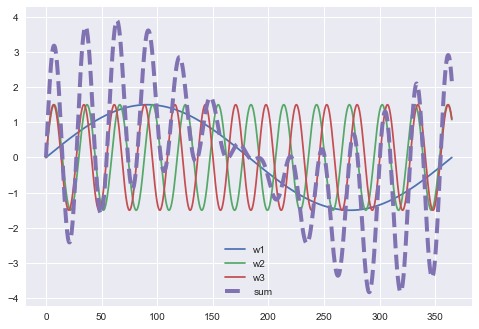

In [17]:
x = np.linspace(0, 365, 1000)
def wave(A,O,PHI):
    return A*np.sin(O*x+PHI)

O1 = 1/( 365  /(2*np.pi))    # second number is period in [days]
O2 = 1/( 29.5  /(2*np.pi))    # second number is period in [days]
O3 = 1/( 27.3  /(2*np.pi))    # second number is period in [days]

w1=wave(1.5,O1,0)
w2=wave(1.5,O2,0)
w3=wave(1.5,O3,0)
plt.plot(x, w1, label='w1')
plt.plot(x, w2, label='w2')
plt.plot(x, w3, label='w3')
plt.plot(x,w1+w2+w3, linestyle='--', label='sum', linewidth=4)
plt.legend();



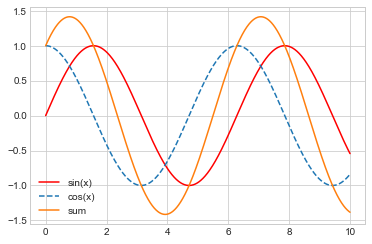

In [3]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, a, color='red', label='sin(x)')
plt.plot(x, b, linestyle='--', label='cos(x)')
plt.plot(x,a+b, label='sum')
plt.legend();